# Empirical comparison of stopping methods for safe use of priority screening in systematic maps and reviews

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/results/results.csv', low_memory=False)
print(df.columns)
df.head()

Index(['dataset', 'ranker', 'sim-rep', 'sim_key', 'batch_i', 'n_total',
       'n_seen', 'n_unseen', 'n_incl', 'n_incl_seen', 'n_incl_batch',
       'n_records_batch', 'ranker-model-ngram_range',
       'ranker-model-max_features', 'ranker-model-min_df',
       'ranker-model-class_weight', 'ranker-model-tol', 'ranker-model-C',
       'ranker-model-solver', 'ranker-model-max_iter',
       'ranker-model-logreg-class_weight', 'ranker-model-logreg-tol',
       'ranker-model-logreg-C', 'ranker-model-logreg-solver',
       'ranker-model-logreg-max_iter', 'sampling-batch-strategy',
       'sampling-batch-stat_batch_size', 'sampling-batch-dyn_min_batch_incl',
       'sampling-batch-dyn_min_batch_size', 'sampling-batch-dyn_growth_rate',
       'sampling-batch-dyn_max_batch_size',
       'sampling-batch-inject_random_batch_every', 'method', 'safe_to_stop',
       'method-hash', 'method-KEY', 'method-safe_to_stop', 'method-score',
       'method-recall_target', 'method-bias', 'method-confidence_l

,dataset,ranker,sim-rep,sim_key,batch_i,n_total,n_seen,n_unseen,n_incl,n_incl_seen,...,method-fraction,method-n_windows,method-curve_estimate,method-window_size,method-s,method-knees,ranker-model-loss,ranker-model-sdg-class_weight,ranker-model-sdg-loss,ranker-model-sdg-max_iter
0,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
len(df.groupby(['sim_key', 'sim-rep']))

25

In [30]:
df['sim_key'].value_counts()

sim_key
sdg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-tuned-930c05c8cdac9ccbcc390b1d38b4f8541a97488b    9396
sdg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_1-5000-0e05d0412af4e88fa6fff4111f56337eb58b2e52           9396
logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-93e4e922be56f84db33980dd428c0e9a4950a7a2       6264
logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_1-5000-01fb80fe3d28ab98bb4036e5284fb1dfba2f5a78        6264
logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-fa7ecade831f941a4d59cd4f893f7b9d85ce6db8       5916
svm-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-fdca82c3d2cc5109a49321675e098dcd876fa9d9          5916
sdg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_1-5000-3bd0a3eb39852a1e47e7d663c5e56f2f9d779eff           3944
svm-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-4abe09f0ed42207a25636c025ab6d1023a86c666          3944
sdg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-tuned-a049db874f0e4826cb1848b95981abda3888e79e    3944
sdg-TrainMode.RESET-BatchStra

In [25]:
df['dataset'].value_counts()

dataset
generic-EGM-28165      9396
generic-review-1253    5916
Name: count, dtype: int64

BUSCAR 1400
CurveFitting nan
HEURISTIC_FRAC 1300
HEURISTIC_FIX 1300
BUSCAR 3200
CurveFitting nan
HEURISTIC_FRAC 500
HEURISTIC_FIX 100


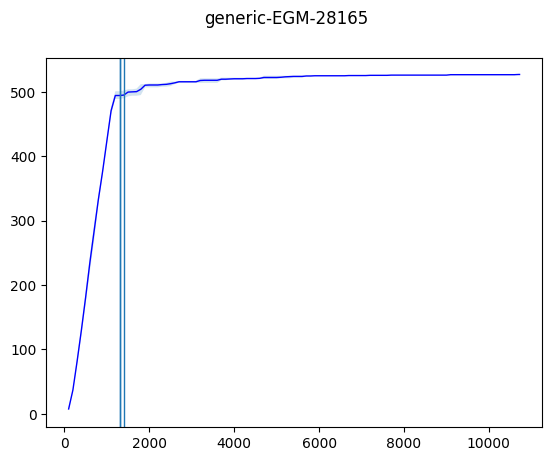

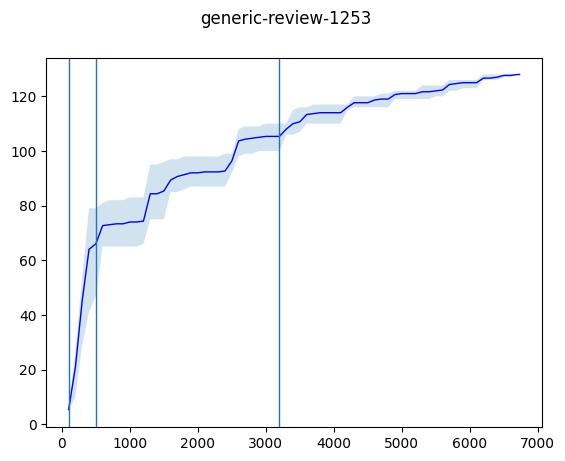

In [24]:
view = df#[df['ranker']=='RegressionRanker']
for dataset, sub_df in df.groupby('dataset'):
    fix, ax = plt.subplots()
    stats = sub_df[['batch_i', 'n_total', 'n_seen', 'n_incl', 'n_incl_seen']].groupby('batch_i').describe()
    ax.fill_between(stats['n_seen', 'min'], stats['n_incl_seen', 'min'], stats['n_incl_seen', 'max'], alpha=0.2)
    ax.plot(stats['n_seen', 'min'], stats['n_incl_seen', 'mean'], color='blue', lw=1)#ls='--',
    for m in sub_df['method'].unique():
        stop_x = sub_df[(sub_df['method']==m) & sub_df['method-safe_to_stop']]['n_seen'].min()
        print(m, stop_x)
        ax.axvline(stop_x, lw=1)
    fix.suptitle(dataset)

In [ ]:

view = df#[df['ranker']=='RegressionRanker']
for dataset, sub_df in df.groupby('dataset'):
    fix, ax = plt.subplots()
    stats = sub_df[['batch_i', 'n_total', 'n_seen', 'n_incl', 'n_incl_seen']].groupby('batch_i').describe()
    print(stats.index)
    print(stats.columns)
    ax.fill_between(stats['n_seen', 'min'], stats['n_incl_seen', 'min'], stats['n_incl_seen', 'max'], alpha=0.2)
    ax.plot(stats['n_seen', 'min'], stats['n_incl_seen', 'mean'], color='blue', lw=1)#ls='--',
    break

In [9]:
simulation

,dataset,ranker,sim-rep,sim_key,batch_i,n_total,n_seen,n_unseen,n_incl,n_incl_seen,...,method-fraction,method-n_windows,method-curve_estimate,method-window_size,method-s,method-knees,ranker-model-loss,ranker-model-sdg-class_weight,ranker-model-sdg-loss,ranker-model-sdg-max_iter
41,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,0,310,100,210,16,4,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,1,310,200,110,16,9,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,2,310,300,10,16,15,...,NaN,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,synergy-Cohen_2006_Antihistamines,RegressionRanker,1,logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1...,3,310,310,0,16,16,...,NaN,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for (hash_ranker, hash_method, repeat), sub_df in df.groupby(['sim_key', 'method-hash', 'sim-rep']):
    simulation = sub_df.sort_values(by=['batch_i'])
    info = simulation.iloc[0]
    print(f'Dataset "{info['dataset']}" ranked by "{info['ranker']}" stopped by "{info['method']}" (repeat {repeat} via {hash_method} / {hash_ranker})')
    for _, step in simulation.iterrows():
        recall = step['n_incl_seen'] / step['n_incl']

        print(f'Batch {step['batch_i']}: {step['n_seen']:,}/{step['n_total']:,} seen; '
              f'{step['n_incl_seen']:,}/{step['n_incl']:,} includes found; '
              f'recall={recall:.2%} | safe to stop: {step['safe_to_stop']}')

    print('---')

Dataset "synergy-Cohen_2006_Antihistamines" ranked by "RegressionRanker" stopped by "ALISON" (repeat 1 via ALISON-417e55e2a26d7f24cad8370396678f36024acb8f / logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-abc01d688811c4d5fa448116b64a3d48cbb5ed64)
Batch 0: 100/310 seen; 4/16 includes found; recall=25.00% | safe to stop: False
Batch 1: 200/310 seen; 9/16 includes found; recall=56.25% | safe to stop: False
Batch 2: 300/310 seen; 15/16 includes found; recall=93.75% | safe to stop: False
Batch 3: 310/310 seen; 16/16 includes found; recall=100.00% | safe to stop: False
---
Dataset "synergy-Cohen_2006_Antihistamines" ranked by "RegressionRanker" stopped by "ALISON" (repeat 1 via ALISON-502d519a5da2e428cb4ae83cc327d8199a4e6e28 / logreg-TrainMode.RESET-BatchStrategy.DYNAMIC-1_3-75000-abc01d688811c4d5fa448116b64a3d48cbb5ed64)
Batch 0: 100/310 seen; 4/16 includes found; recall=25.00% | safe to stop: False
Batch 1: 200/310 seen; 9/16 includes found; recall=56.25% | safe to stop: False
Batch